In [1]:
import sys
import pandas as pd
import json
import numpy as np
from helper import *
import argparse
from rsa import RSA
import matplotlib.pyplot as plt
import os

with open('config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']

{'ref_sents': ['horse', 'First horse on the left', 'left horse'], 'label': 19, 'bbox': [[170.22000122070312, 137.5800018310547, 95.98999786376953, 200.36000061035156]]}
/scratch2/hle/refCOCO/test/imgs_by_id/408846.jpg


,box_alias,image_id,ann_id,ref_id,salience,x1,y1,w,h,TYPE_yolk,...,ATTR_thin,ATTR_decorative,ATTR_wrinkled,ATTR_peeling,ATTR_golden,ATTR_metallic,ATTR_back,ATTR_thick,ATTR_black and white,ATTR_leaning
0,horse-1,408846,275265,15042,0.060574,352.476929,134.663116,91.171448,204.103546,0.000624,...,0.002493,0.002492,0.002492,0.002492,0.002493,0.002492,0.002494,0.002492,0.002494,0.002494
1,horse-2,408846,275265,15042,0.068497,159.280258,120.313499,103.214279,203.870697,0.000624,...,0.002493,0.002492,0.002492,0.002492,0.002493,0.002493,0.002495,0.002493,0.002494,0.002495
2,shirt-1,408846,275265,15042,0.008308,40.298626,198.383270,50.267803,50.775406,0.000624,...,0.002493,0.002493,0.002494,0.002493,0.002493,0.002493,0.002493,0.002493,0.002493,0.002493
3,man-1,408846,275265,15042,0.044475,24.898825,168.935165,79.647308,171.539017,0.000624,...,0.002493,0.002493,0.002493,0.002493,0.002493,0.002493,0.002495,0.002493,0.002494,0.002515
4,shirt-2,408846,275265,15042,0.005135,492.340485,126.447075,39.281342,40.157707,0.000624,...,0.002490,0.002490,0.002490,0.002490,0.002490,0.002490,0.002490,0.002490,0.002490,0.002490
5,woman-1,408846,275265,15042,0.049862,419.910095,163.959778,83.596375,183.233337,0.000624,...,0.002494,0.002493,0.002493,0.002493,0.002493,0.002493,0.002495,0.002493,0.002494,0.002509
6,tree-1,408846,275265,15042,0.140140,40.189125,3.112427,176.065033,244.516800,0.000624,...,0.002497,0.002494,0.002493,0.002493,0.002493,0.002493,0.002495,0.002498,0.002493,0.002494
7,shirt-3,408846,275265,15042,0.014233,420.418793,188.988647,64.492523,67.795471,0.000624,...,0.002490,0.002490,0.002490,0.002490,0.002490,0.002490,0.002490,0.002490,0.002490,0.002490
8,man-2,408846,275265,15042,0.014226,485.028748,110.587997,51.253174,85.266968,0.000624,...,0.002493,0.002493,0.002493,0.002493,0.002493,0.002494,0.002495,0.002493,0.002493,0.002525
9,window-1,408846,275265,15042,0.002917,15.908256,112.716141,17.676273,50.695923,0.000624,...,0.002499,0.002498,0.002494,0.002494,0.002494,0.002495,0.002501,0.002496,0.002496,0.002494


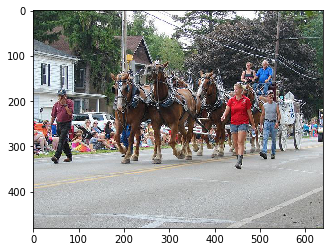

In [4]:
file_id = 1802#4103#1784#137#67#21540#3278#182

df = pd.read_csv(os.path.join(data_path,f'refCOCO/test/attr_tables_with_target_box/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')
# df = pd.read_csv(os.path.join(data_path,f'refCOCO/test/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')
with open(os.path.join(data_path,f'refCOCO/test/labels/lab_{file_id}.json')) as json_file:
    label = json.load(json_file)
refs = [[r] for r in label['ref_sents']]
print(label)
img_id = df['image_id'][0]
filename = os.path.join(data_path, f'refCOCO/test/imgs_by_id/{img_id}.jpg')
print(filename)
image = plt.imread(filename)
plt.imshow(image)
df

### Displaying the image and detected bounding boxes & the target box

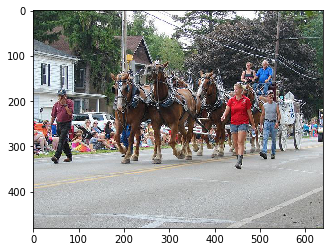

In [5]:
plt.imshow(image)

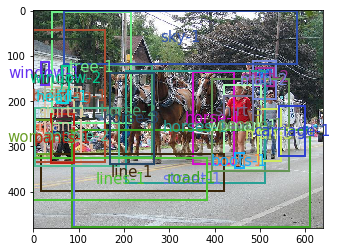

In [7]:
box_data = df[['box_alias', 'x1','y1','w','h']]
fig,ax = plt.subplots(1)
img = image

ax.imshow(img)
rng = [i for i in range(len(box_data))]
for i in rng[:]:
    name, x,y,w,h = list(box_data.iloc[i,:])
    ax,_ = draw_box_obj(name,x,y,w,h,img,ax)

['horse', 'First horse on the left', 'left horse']


(<matplotlib.axes._subplots.AxesSubplot at 0x7f0d723690d0>,
 array([0.89991974, 0.69639373, 0.06293738]))

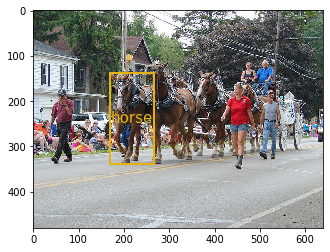

In [8]:
print(label['ref_sents'])
bbox = label['bbox'][0]
sentence = label['ref_sents'][0]
fig,ax_true_label = plt.subplots(1)
ax_true_label.imshow(img)
draw_box_obj(sentence,bbox[0],bbox[1],bbox[2],bbox[3],img,ax_true_label)

### Create an rsa_agent instance with the given image data as the context.

In [10]:
# matched_label = np.load('test_imgs_label_matching.npy', allow_pickle=True)
matched_label = np.load('test_imgs_label_matching_with_true_target.npy', allow_pickle=True)
rel_load = np.load(f'./test_relation_extraction.npy', allow_pickle=True)
generated_relation = rel_load[file_id]
rsa_agent = RSA(df,generated_relations=generated_relation)
#targets = [matched_label[file_id][j][1] for j in range(min(3, len(matched_label[file_id])))]

# word_lists = [rsa_agent.full_speaker(target) for target in targets]

# expression = [' '.join(word_lists[j][::-1]) for j in range(len(word_lists))]

In [11]:
matched_label[1802]

[[30, 'horse-3', 0.9999999205188589],
 [1, 'horse-2', 0.7468223094677757],
 [10, 'horses-1', 0.150445630945744],
 [6, 'tree-1', 0.08853992079313429],
 [23, 'people-2', 0.05811024551594777]]

### generating referring expression for a target 

In [12]:
rsa_agent.full_speaker('horse-2')

/scratch2/hle/git/rsa_refer/rsa.py:137: RuntimeWarning: invalid value encountered in true_divide
  return result/np.sum(result)


(['horse', 'the second from left'], False)

### Displaying possible types related to each object. 
For example, carriage-1': {'carriage': 1, 'cart': 1} means that object 'carriage-1' can be of type carriage or cart.

In [13]:
rsa_agent.obj_to_types

defaultdict(dict,
            {'boot-1': {'OOV': 1, 'boot': 1, 'boots': 1},
             'boots-1': {'OOV': 1, 'boot': 1, 'boots': 1},
             'building-1': {'OOV': 1, 'building': 1, 'house': 1},
             'carriage-1': {'carriage': 1, 'cart': 1},
             'cart-1': {'carriage': 1, 'cart': 1},
             'hat-1': {'OOV': 1, 'cap': 1, 'hat': 1},
             'head-1': {'OOV': 1, 'hat': 1, 'head': 1},
             'horse-1': {'horse': 1},
             'horse-2': {'horse': 1},
             'horse-3': {'horse': 1},
             'horses-1': {'horse': 1, 'horses': 1},
             'house-1': {'building': 1, 'house': 1},
             'line-1': {'line': 1, 'lines': 1},
             'lines-1': {'OOV': 1, 'line': 1, 'lines': 1},
             'man-1': {'man': 1},
             'man-2': {'man': 1},
             'man-3': {'jeans': 1, 'man': 1, 'person': 1, 'woman': 1},
             'pants-1': {'man': 1, 'pants': 1},
             'people-1': {'OOV': 1, 'people': 1},
             'people

### Displaying attributes related to each object. 
For example, 'head-1': {'backwards': 1,
              'baseball': 1,
              'black': 1, 
means that object 'head-1' has attributes such as 'backwards', 'black', 'baseball'. This is equivalent to a 'green-square' object being 'green' and 'square' in the toy example.

In [14]:
rsa_agent.obj_to_attributes

defaultdict(dict,
            {'boot-1': {'black': 1,
              'blue': 1,
              'brown': 1,
              'dark': 1,
              'gray': 1,
              'leather': 1,
              'long': 1,
              'metal': 1,
              'silver': 1,
              'tall': 1},
             'boots-1': {'black': 1,
              'blue': 1,
              'brown': 1,
              'dark': 1,
              'gray': 1,
              'leather': 1,
              'long': 1,
              'metal': 1,
              'silver': 1,
              'tall': 1},
             'building-1': {'bare': 1,
              'behind boot': 0.021670792251825333,
              'behind carriage': 0.0035969375167042017,
              'behind hat': 0.022130651399493214,
              'behind head': 0.4695689976215362,
              'behind man': 0.0011211897945031524,
              'behind people': 0.1512761414051056,
              'behind woman': 0.01740858517587185,
              'beige': 1,
              'big'